In [1]:
import random
import itertools
import operator
import pickle
import pipe21 as P

import networkx as nx
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from graphviz import Graph

from musictool.noteset import NoteSet
from musictool.noteset import NoteRange
from musictool.note import Note
from musictool.scale import Scale
from musictool.chord import SpecificChord
from musictool.chord import Chord
from musictool.voice_leading.transition import chord_transitions
from musictool.voice_leading.transition import transition_graph
from musictool.voice_leading.transition import abstract_graph
from musictool.voice_leading.transition import AbstractChordGraph

In [2]:
AbstractStrGraph = dict[str, frozenset[str]]

def str_graph(g: AbstractChordGraph) -> AbstractStrGraph:
    return {
        str(k): frozenset(str(c) for c in v)
        for k, v in g.items()
    } 

In [3]:
scale = Scale.from_name('C', 'major')
noterange = NoteRange('C1', 'C3', noteset=scale)

In [4]:
c = SpecificChord.from_str('C2_D2')

In [5]:
ns = NoteSet.from_str('CD')
ns

CD

In [6]:
c.abstract

CD

In [8]:
graph = transition_graph(c, noterange)
graph = abstract_graph(graph)
graph = str_graph(graph)
graph

{'CD': frozenset({'C', 'CE', 'D', 'DB'}),
 'DB': frozenset({'CB', 'CD', 'DA', 'EB'}),
 'DA': frozenset({'CA', 'DB', 'DG', 'EA'}),
 'EA': frozenset({'DA', 'EB', 'EG', 'FA'}),
 'EB': frozenset({'CE', 'DB', 'EA', 'FB'}),
 'FB': frozenset({'CF', 'EB', 'FA', 'GB'}),
 'CF': frozenset({'CE', 'CG', 'DF', 'FB'}),
 'CG': frozenset({'CA', 'CF', 'DG', 'GB'}),
 'DG': frozenset({'CG', 'DA', 'DF', 'EG'}),
 'CA': frozenset({'AB', 'CB', 'CG', 'DA'}),
 'AB': frozenset({'A', 'B', 'CA', 'GB'}),
 'B': frozenset({'AB', 'CB'}),
 'CB': frozenset({'B', 'C', 'CA', 'DB'}),
 'A': frozenset({'AB', 'GA'}),
 'GA': frozenset({'A', 'FA', 'G', 'GB'}),
 'FA': frozenset({'EA', 'FB', 'FG', 'GA'}),
 'FG': frozenset({'EG', 'F', 'FA', 'G'}),
 'F': frozenset({'EF', 'FG'}),
 'EF': frozenset({'DF', 'E', 'EG', 'F'}),
 'DF': frozenset({'CF', 'DE', 'DG', 'EF'}),
 'DE': frozenset({'CE', 'D', 'DF', 'E'}),
 'CE': frozenset({'CD', 'CF', 'DE', 'EB'}),
 'C': frozenset({'CB', 'CD'}),
 'EG': frozenset({'DG', 'EA', 'EF', 'FG'}),
 'E': froz

In [10]:
# g = Graph()

# rendered = set()

# for node, childs in graph.items():
#     for child in childs:
#         a, b = str(node), str(child)
#         pair = frozenset({a, b})
#         if pair in rendered:
#             continue
#         g.edge(a, b)
#         rendered.add(pair)
# g

# with open('/tmp/tree.pdf', 'wb') as fd:
#     fd.write(g.pipe(format='pdf'))
# !open /tmp/tree.pdf

In [11]:
len(graph)

28

In [13]:
G = nx.Graph(graph)

In [14]:
tup = tuple(graph)
n = len(graph)

In [15]:
# data = np.zeros((n, n), dtype='int32')
# for i in range(n):
#     for j in range(n):
#         data[i, j] = nx.shortest_path_length(G, tup[i], tup[j])

In [16]:
data = pd.DataFrame(np.zeros((n, n), dtype='int32'), index=tup, columns=tup, dtype='int32')
for a, b in itertools.product(tup, tup):
    data.loc[a, b] = nx.shortest_path_length(G, a, b)
data

,CD,DB,DA,EA,EB,FB,CF,CG,DG,CA,...,EF,DF,DE,CE,C,EG,E,GB,D,G
CD,0,1,2,3,2,3,2,3,3,3,...,4,3,2,1,1,4,3,4,1,6
DB,1,0,1,2,1,2,3,3,2,2,...,4,3,3,2,2,3,4,3,2,5
DA,2,1,0,1,2,3,3,2,1,1,...,3,2,3,3,3,2,4,3,3,4
EA,3,2,1,0,1,2,3,3,2,2,...,2,3,3,2,4,1,3,3,4,3
EB,2,1,2,1,0,1,2,3,3,3,...,3,3,2,1,3,2,3,2,3,4
FB,3,2,3,2,1,0,1,2,3,3,...,3,2,3,2,4,3,4,1,4,3
CF,2,3,3,3,2,1,0,1,2,2,...,2,1,2,1,3,3,3,2,3,4
CG,3,3,2,3,3,2,1,0,1,1,...,3,2,3,2,3,2,4,1,4,3
DG,3,2,1,2,3,3,2,1,0,2,...,2,1,2,3,4,1,3,2,3,3
CA,3,2,1,2,3,3,2,1,2,0,...,4,3,4,3,2,3,5,2,4,4


# umap 2D embedding

In [18]:
e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=2, learning_rate=0.001).fit_transform(data)
e

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


array([[0.8138086 , 6.722987  ],
       [1.5208198 , 4.885054  ],
       [3.1911402 , 4.1741595 ],
       [2.8826737 , 2.3834717 ],
       [4.06156   , 0.7964952 ],
       [5.6852818 , 1.9033495 ],
       [6.0375786 , 3.7619758 ],
       [4.371671  , 6.8061504 ],
       [2.7055752 , 7.5279546 ],
       [3.6723294 , 9.220146  ],
       [1.7616305 , 8.456269  ],
       [3.2359762 , 5.759055  ],
       [6.6653714 , 5.1602373 ],
       [5.824145  , 6.4127016 ],
       [5.3461905 , 8.308464  ],
       [7.3806596 , 8.571941  ],
       [7.7845445 , 6.6062007 ],
       [9.196932  , 5.271865  ],
       [7.9283943 , 3.8329406 ],
       [7.7408566 , 1.8207246 ],
       [4.5189705 , 3.3283424 ],
       [0.9875475 , 2.985157  ],
       [0.21927822, 4.8384876 ],
       [2.1033595 , 1.3104193 ],
       [6.166973  , 0.67854863],
       [8.872165  , 7.319418  ],
       [5.7327366 , 9.545847  ],
       [9.105144  , 3.2120311 ]], dtype=float32)

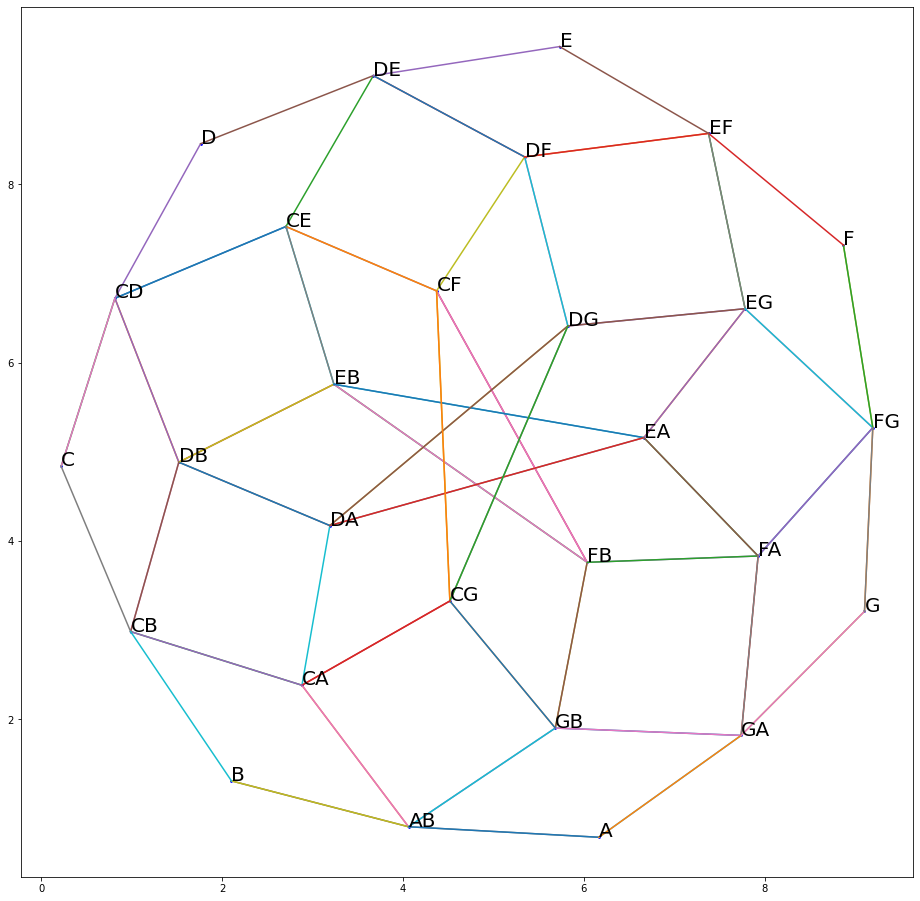

In [19]:
plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(tup):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    
for k, v in graph.items():
    i = tup.index(k)
    js = [tup.index(vv) for vv in v]
    
    for j in js:
        plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

In [17]:
def rootless_key(noteset: NoteSet, scale: NoteSet, hash_: bool = True) -> frozenset[int]:
    """
    inverse-free
    like name for notesets which have root
    but for rootless notesets
    """
    def second_key(fs: frozenset) -> float:
        mean_std = fs | P.Map(np.std) | P.Pipe(list) | P.Pipe(np.mean)
        flat_std = fs | P.Pipe(itertools.chain.from_iterable) | P.Pipe(list) | P.Pipe(np.std)
        return mean_std or flat_std
        
    s = set()
    for perm in itertools.permutations(noteset, len(noteset)):
        s.add(tuple(scale.subtract(a, b) for a, b in itertools.pairwise(perm)))
    fs = frozenset(s)
#     return second_key(fs), fs
    if hash_:
        return hash(fs)
    return fs

def groupby_tiers(scale: NoteSet, n_notes: int = 2):
    return (
        itertools.combinations(scale, n_notes)
        | P.Map(frozenset)
        | P.Map(NoteSet)
        | P.KeyBy(lambda chord: rootless_key(chord, scale))
        | P.MapValues(str)
        | P.Sorted(key=operator.itemgetter(0))
        | P.GroupBy(operator.itemgetter(0))
        | P.Values()
        | P.Map(lambda x: x | P.Values() | P.Pipe(list))
        | P.Pipe(list)
    )

In [18]:
for n_notes in (1, 2, 3):
    for q in groupby_tiers(scale, n_notes):
        print(q)

['C', 'D', 'E', 'F', 'G', 'A', 'B']
['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB']
['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB']
['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']
['CEG', 'CEA', 'CFA', 'DFA', 'DFB', 'DGB', 'EGB']
['CDE', 'CDB', 'CAB', 'DEF', 'EFG', 'FGA', 'GAB']
['CDA', 'CEF', 'CGB', 'DEB', 'DFG', 'EGA', 'FAB']
['CDF', 'CEB', 'CGA', 'DEG', 'DAB', 'EFA', 'FGB']
['CDG', 'CFG', 'CFB', 'DEA', 'DGA', 'EFB', 'EAB']


In [19]:
# df = data.astype(float)

# for q in groupby_tiers(scale, 2):
#     for a, b in itertools.product(q, q):
#         df.loc[a, b] *= 0.1
# df

# MANUAL TIERS SORT

In [20]:
e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=2, learning_rate=0.001).fit_transform(df)

NameError: name 'df' is not defined

In [92]:
e

array([[0.8201461 , 6.734209  ],
       [1.5114546 , 4.8607025 ],
       [3.185484  , 4.1602488 ],
       [2.9091494 , 2.3891788 ],
       [4.0860486 , 0.8023822 ],
       [5.6884546 , 1.9168336 ],
       [6.0385094 , 3.7446709 ],
       [4.3691874 , 6.8161197 ],
       [2.6961522 , 7.546862  ],
       [3.67714   , 9.227247  ],
       [1.7534438 , 8.460803  ],
       [3.2160099 , 5.7262087 ],
       [6.654519  , 5.1336284 ],
       [5.8238153 , 6.406596  ],
       [5.3577223 , 8.315007  ],
       [7.3876004 , 8.564273  ],
       [7.754897  , 6.557823  ],
       [9.2053795 , 5.2928667 ],
       [7.9429135 , 3.8210828 ],
       [7.748883  , 1.8281783 ],
       [4.52069   , 3.3351038 ],
       [0.9969242 , 2.9734468 ],
       [0.19775778, 4.84762   ],
       [2.1305625 , 1.3462118 ],
       [6.1788487 , 0.6856535 ],
       [8.86529   , 7.313258  ],
       [5.73544   , 9.574946  ],
       [9.0949335 , 3.2365756 ]], dtype=float32)

In [104]:
def sort_tiers(e, df):
    ...

[4.8409777 5.057777 ]


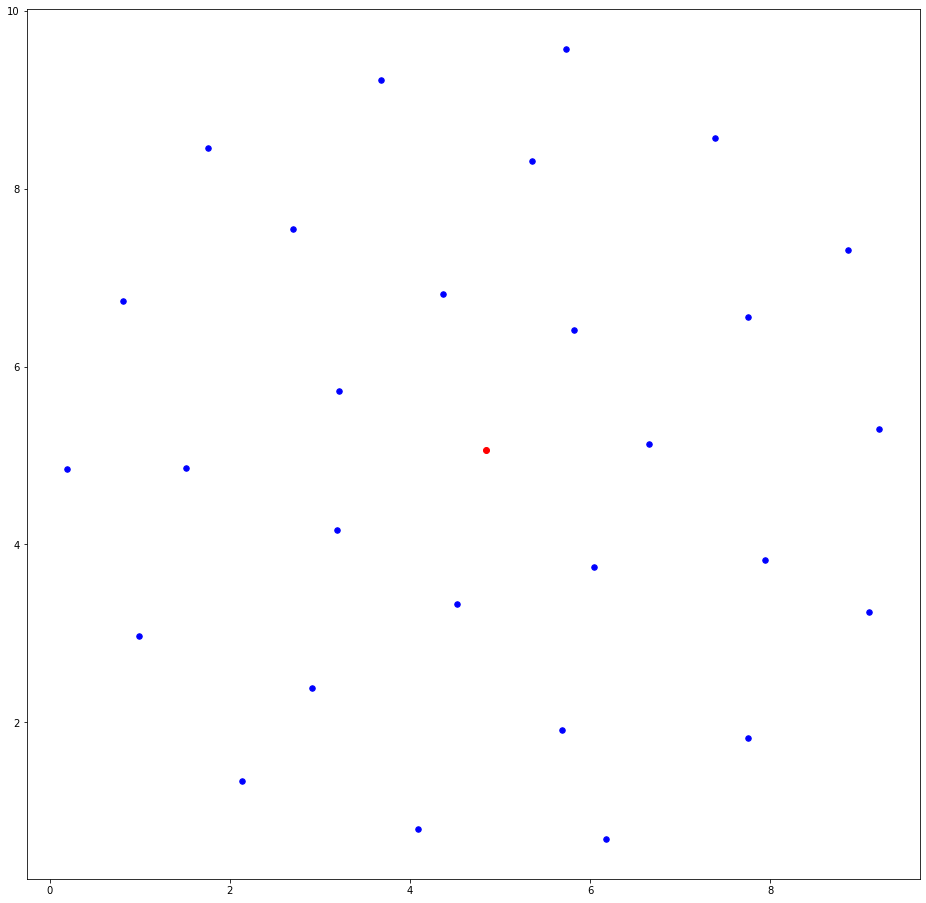

In [153]:
center = e.mean(axis=0)
print(center)

plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=30, color='b')
# plt.scatter(*center, color='r')
plt.scatter(center[0], center[1], color='r')

In [21]:
tier = 0
tier_to_chords = {}

for n_notes in (1, 2):
    for q in groupby_tiers(scale, n_notes):
        print(q)
        tier_to_chords[tier] = q
        tier += 1
tier_to_chords

['C', 'D', 'E', 'F', 'G', 'A', 'B']
['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB']
['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB']
['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']


{0: ['C', 'D', 'E', 'F', 'G', 'A', 'B'],
 1: ['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB'],
 2: ['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB'],
 3: ['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']}

In [293]:
tier_to_chords = {0: ['C', 'D', 'E', 'F', 'G', 'A', 'B'],
 1: ['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB'],
 2: ['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB'],
 3: ['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']}

In [306]:
X = pd.DataFrame(e, index=data.index, columns=list('xy'))
X = X.assign(z=np.nan)
for tier, chords in tier_to_chords.items():
    X.loc[chords, 'z'] = tier
X.z = X.z * 3
X

,x,y,z
CD,0.820146,6.734209,3.0
DB,1.511455,4.860703,6.0
DA,3.185484,4.160249,9.0
CA,2.909149,2.389179,6.0
AB,4.086049,0.802382,3.0
GB,5.688455,1.916834,6.0
FB,6.038509,3.744671,9.0
CF,4.369187,6.816120,9.0
CE,2.696152,7.546862,6.0
DE,3.677140,9.227247,3.0


In [ ]:
# X = pd.DataFrame(
#     np.hstack((e, np.zeros((e.shape[0], 1), dtype='float32'))),
#     index = df.index,
#     columns=list('xyz'),
# )
# X

In [99]:
# X = pd.DataFrame(
#     np.hstack((e, np.zeros((e.shape[0], 1), dtype='float32'))),
#     index = df.index,
#     columns=list('xyz'),
# )
# X

,x,y,z
CD,0.820146,6.734209,0.0
DB,1.511455,4.860703,0.0
DA,3.185484,4.160249,0.0
CA,2.909149,2.389179,0.0
AB,4.086049,0.802382,0.0
GB,5.688455,1.916834,0.0
FB,6.038509,3.744671,0.0
CF,4.369187,6.816120,0.0
CE,2.696152,7.546862,0.0
DE,3.677140,9.227247,0.0


In [100]:
z = 10
for q in groupby_tiers(scale, 2):
    for x in q:
        X.loc[x, 'z'] = z # kinda z
    z += 10
        
    print(q)
#     for a, b in itertools.product(q, q):
#         df.loc[a, b] *= 0.1


['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB']
['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB']
['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']


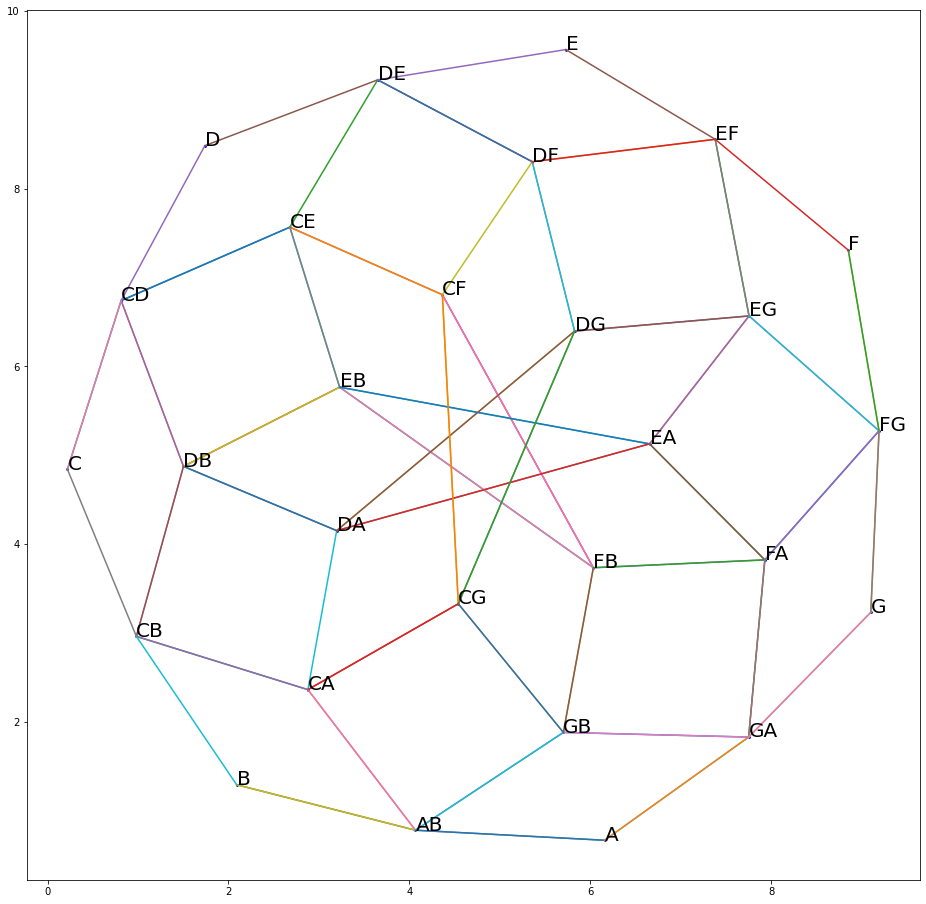

In [34]:
e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=2, learning_rate=0.001).fit_transform(df)
plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(tup):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    
for k, v in graph.items():
    i = tup.index(k)
    js = [tup.index(vv) for vv in v]
    
    for j in js:
        plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

In [307]:
# e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=3, learning_rate=0.001).fit_transform(df)
# str_graph = {str(k): frozenset(str(vv) for vv in v) for k, v in graph.items()}
with open('graph.pkl', 'wb') as f:
    pickle.dump(str_graph, f)
    

# X = pd.DataFrame(e * 3, columns=list('xyz'))
# X = pd.DataFrame(e[:, [1, 2, 0]] * 3, columns=list('xyz'))
# X.index = [str(c) for c in tup]
X.to_csv('X.csv')
# X

# triads (3 note intervals)

In [22]:
c = SpecificChord.from_str('C2_D2_E2')
graph = transition_graph(c, noterange, same_length=False)
graph = abstract_graph(graph)

# graph = transition_graph(c, noterange, same_length=True)
# graph = abstract_graph(graph, length=3)

graph = str_graph(graph)
graph

{'CDE': frozenset({'CD', 'CDF', 'CE', 'DE', 'DEB'}),
 'CD': frozenset({'C', 'CD', 'CDB', 'CDE', 'CE', 'D', 'DB'}),
 'CE': frozenset({'CD', 'CDE', 'CEB', 'CEF', 'CF', 'DE', 'EB'}),
 'EB': frozenset({'CE', 'CEB', 'DB', 'DEB', 'EA', 'EAB', 'EFB', 'FB'}),
 'EA': frozenset({'DA', 'DEA', 'EAB', 'EB', 'EFA', 'EG', 'EGA', 'FA'}),
 'DA': frozenset({'CA', 'CDA', 'DAB', 'DB', 'DEA', 'DG', 'DGA', 'EA'}),
 'DG': frozenset({'CDG', 'CG', 'DA', 'DEG', 'DF', 'DFG', 'DGA', 'EG'}),
 'DF': frozenset({'CDF', 'CF', 'DE', 'DEF', 'DFG', 'DG', 'EF'}),
 'EF': frozenset({'DEF', 'DF', 'E', 'EF', 'EFG', 'EG', 'F'}),
 'F': frozenset({'E', 'EF', 'FG', 'G'}),
 'DE': frozenset({'CDE', 'CE', 'D', 'DE', 'DEF', 'DF', 'E'}),
 'C': frozenset({'B', 'CB', 'CD', 'D'}),
 'DB': frozenset({'CB', 'CD', 'CDB', 'DA', 'DAB', 'DEB', 'EB'}),
 'CB': frozenset({'B', 'C', 'CA', 'CAB', 'CB', 'CDB', 'DB'}),
 'CA': frozenset({'AB', 'CAB', 'CB', 'CDA', 'CG', 'CGA', 'DA'}),
 'EG': frozenset({'DEG', 'DG', 'EA', 'EF', 'EFG', 'EGA', 'FG'}),
 'CG

In [23]:
G = nx.Graph(graph)
tup = tuple(graph)
n = len(graph)

In [24]:
data = pd.DataFrame(np.zeros((n, n), dtype='int32'), index=tup, columns=tup, dtype='int32')
for a, b in itertools.product(tup, tup):
    data.loc[a, b] = nx.shortest_path_length(G, a, b)
data

,CDE,CD,CE,EB,EA,DA,DG,DF,EF,F,...,DEF,EFG,DFG,FGB,CGA,CGB,GAB,EAB,CEF,DEA
CDE,0,1,1,2,3,3,3,2,3,3,...,2,4,3,4,4,4,5,3,2,2
CD,1,0,1,2,3,2,3,3,3,3,...,3,4,4,4,4,4,4,3,2,3
CE,1,1,0,1,2,3,3,2,3,3,...,2,4,3,3,3,3,4,2,1,3
EB,2,2,1,0,1,2,3,3,3,4,...,3,3,4,2,4,3,3,1,2,2
EA,3,3,2,1,0,1,2,3,2,3,...,3,2,3,3,3,4,3,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGB,4,4,3,3,4,3,2,3,4,4,...,4,4,3,2,1,0,2,3,3,4
GAB,5,4,4,3,3,3,3,4,4,3,...,5,4,4,2,1,2,0,2,4,4
EAB,3,3,2,1,1,2,3,4,3,4,...,4,3,4,2,3,3,2,0,3,2
CEF,2,2,1,2,3,4,3,2,2,3,...,1,3,3,3,3,3,4,3,0,3


In [25]:
tier_to_chords = []

for n_notes in [3]:
    for q in groupby_tiers(scale, n_notes):
        tier_to_chords.append(q)
tier_to_chords

[['CEG', 'CEA', 'CFA', 'DFA', 'DFB', 'DGB', 'EGB'],
 ['CDE', 'CDB', 'CAB', 'DEF', 'EFG', 'FGA', 'GAB'],
 ['CDA', 'CEF', 'CGB', 'DEB', 'DFG', 'EGA', 'FAB'],
 ['CDF', 'CEB', 'CGA', 'DEG', 'DAB', 'EFA', 'FGB'],
 ['CDG', 'CFG', 'CFB', 'DEA', 'DGA', 'EFB', 'EAB']]

In [26]:
tier_to_chords = []

for n_notes in (1, 2, 3):
    for q in groupby_tiers(scale, n_notes):
        tier_to_chords.append(q)
tier_to_chords

[['C', 'D', 'E', 'F', 'G', 'A', 'B'],
 ['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB'],
 ['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB'],
 ['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB'],
 ['CEG', 'CEA', 'CFA', 'DFA', 'DFB', 'DGB', 'EGB'],
 ['CDE', 'CDB', 'CAB', 'DEF', 'EFG', 'FGA', 'GAB'],
 ['CDA', 'CEF', 'CGB', 'DEB', 'DFG', 'EGA', 'FAB'],
 ['CDF', 'CEB', 'CGA', 'DEG', 'DAB', 'EFA', 'FGB'],
 ['CDG', 'CFG', 'CFB', 'DEA', 'DGA', 'EFB', 'EAB']]

In [27]:
tier_to_chords =[
 ['C', 'D', 'E', 'F', 'G', 'A', 'B'],
 ['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB'],
 ['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB'],
 ['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB'],
 ['CDE', 'CDB', 'CAB', 'DEF', 'EFG', 'FGA', 'GAB'],
 ['CDF', 'CEB', 'CGA', 'DEG', 'DAB', 'EFA', 'FGB'],
 ['CDA', 'CEF', 'CGB', 'DEB', 'DFG', 'EGA', 'FAB'],
 ['CDG', 'CFG', 'CFB', 'DEA', 'DGA', 'EFB', 'EAB'],
 ['CEG', 'CEA', 'CFA', 'DFA', 'DFB', 'DGB', 'EGB'],
]

/usr/local/lib/python3.10/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


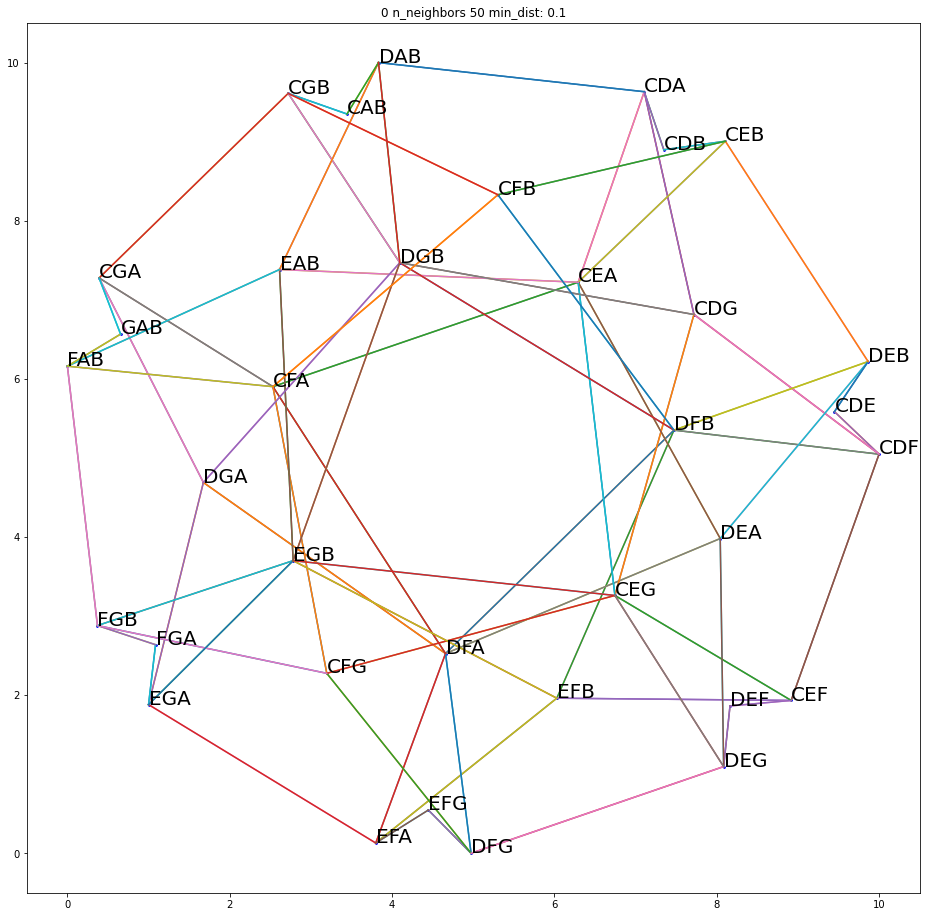

In [617]:
for num, (n_neighbors, min_dist) in enumerate(itertools.product(
    [50],
    [0.1]
#     np.linspace(0.01, 0.99, 5),
)):
    e = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=2,
        learning_rate=0.000001,
    ).fit_transform(data)

    plt.figure(figsize=(16, 16))
    plt.scatter(*e.T, s=3, color='b')

    for i, (chord) in enumerate(tup):
        plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)


    for k, v in graph.items():
        i = tup.index(k)
        js = [tup.index(vv) for vv in v]

        for j in js:
            plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])
            
    fn = f'{num} n_neighbors {n_neighbors} min_dist: {min_dist}'
    plt.title(fn)
    plt.savefig(f'img/{fn}.png')

In [107]:
n = 7 * 2
for i in range(n + 1):
    print(i / n)

0.0
0.07142857142857142
0.14285714285714285
0.21428571428571427
0.2857142857142857
0.35714285714285715
0.42857142857142855
0.5
0.5714285714285714
0.6428571428571429
0.7142857142857143
0.7857142857142857
0.8571428571428571
0.9285714285714286
1.0


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


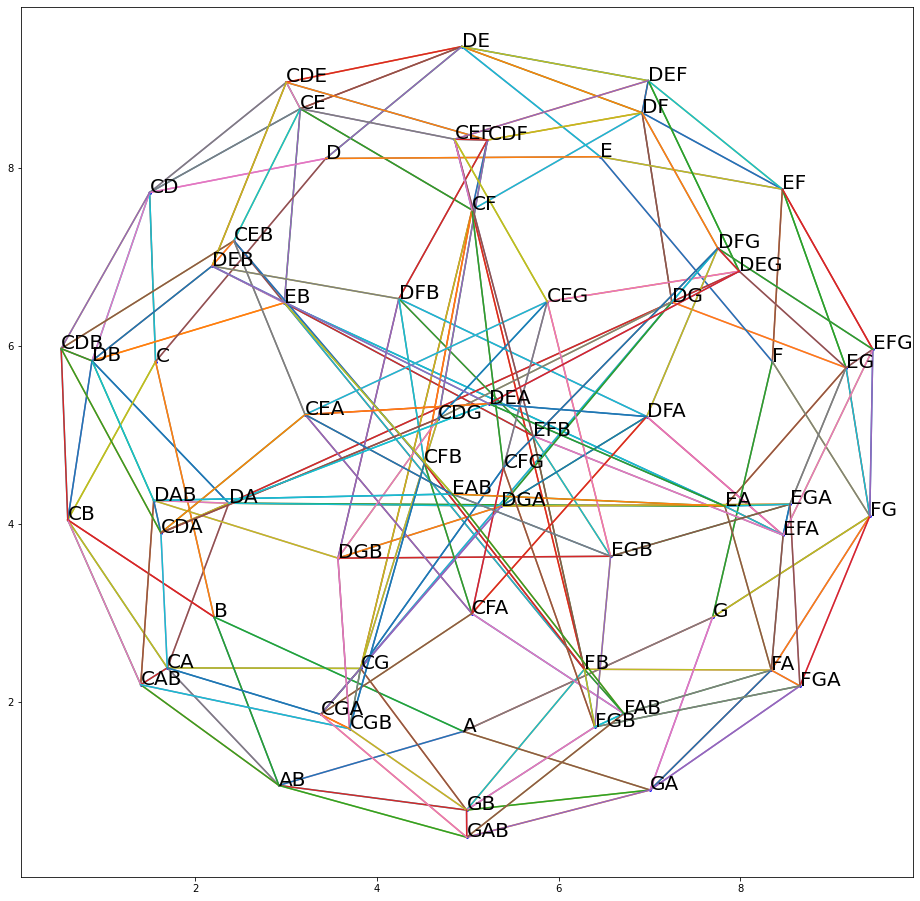

In [28]:
e = umap.UMAP(
#     n_neighbors=10, # norm
    n_neighbors=13,
    min_dist=0.1,
#     n_epochs=10000,
#     metric='euclidean',
#     metric='manhattan',
#     metric='chebyshev',
#     metric='minkowski',
    
    n_components=2,
    learning_rate=0.001,
).fit_transform(data)

plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(tup):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    
for k, v in graph.items():
    i = tup.index(k)
    js = [tup.index(vv) for vv in v]
    
    for j in js:
        plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

In [29]:
X = pd.DataFrame(e, index=data.index, columns=list('xy'))
X = X.assign(z=np.nan)
for tier, chords in enumerate(tier_to_chords):
    X.loc[chords, 'z'] = tier
X.z = X.z * 2
X

,x,y,z
CDE,3.003410,8.963375,8.0
CD,1.498909,7.725060,2.0
CE,3.157259,8.667319,4.0
EB,2.981204,6.486806,6.0
EA,7.830099,4.201528,6.0
...,...,...,...
CGB,3.699505,1.701746,12.0
GAB,4.989379,0.482269,8.0
EAB,4.830364,4.338773,14.0
CEF,4.854041,8.324323,12.0


In [646]:
# e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=3, learning_rate=0.001).fit_transform(df)
# str_graph = {str(k): frozenset(str(vv) for vv in v) for k, v in graph.items()}
with open('graph.pkl', 'wb') as f:
    pickle.dump(graph, f)
    

# X = pd.DataFrame(e * 3, columns=list('xyz'))
# X = pd.DataFrame(e[:, [1, 2, 0]] * 3, columns=list('xyz'))
# X.index = [str(c) for c in tup]
X.to_csv('X.csv')
# X

# todo: 3d plot using `pyqtgraph`
- try to add many projections with tiers (like major, minor, diminished chords) Like tiers in 2D (2 notes chords)
    - start with 2D, because i already know which result i should get (tiers)
        - draw layered pyramid in pyqtgraph

In [30]:
def add_radius_angle(X: pd.DataFrame):
    C = X.x + 1j * X.y
    return (
        X
        .assign(radius = np.absolute(C))
        .assign(angle = np.angle(C))
    )

def update_tier(
    R: pd.DataFrame, # in polar form
    tier: int,
    radius: float | None = None,
    angle_offset: float | None = None,
    z: float | None = None,
):
    R = R.copy()
    if radius is not None:
        R.loc[R.tier == tier, 'radius'] = radius
    if angle_offset is not None:
        R.loc[R.tier == tier, 'angle'] = R.loc[R.tier == tier, 'angle'] + angle_offset
    if z is not None:
        R.loc[R.tier == tier, 'z'] = z
    C = R['radius'] * (np.cos(R['angle']) + 1j * np.sin(R['angle']))
    R['x'] = C.values.real
    R['y'] = C.values.imag
    
    return R

In [31]:
e = umap.UMAP(
    n_neighbors=32,
    min_dist=0.9,
    n_components=3,
#     n_epochs=1000,
    learning_rate=0.000001,
).fit_transform(data)
e *= 3
center = e.mean(axis=0)
e[:, [0, 1]] -= center[[0, 1]]

# ================================================================

X = pd.DataFrame(e, index = [str(c) for c in tup], columns=list('xyz'))
# X.to_csv('X3.csv')


Tc, Tx = zip(*
    tier_to_chords
    | P.Pipe(enumerate)
    | P.FlatMap(lambda kV: ((kV[0], v) for v in kV[1]))
    | P.Pipe(list)
)

X.loc[list(Tx), 'tier'] = Tc

X = add_radius_angle(X)
# X = update_tier(X, tier=0, z=40)
# X = update_tier(X, tier=1, z=35)
# X = update_tier(X, tier=4, z=30, radius=19)
# X = update_tier(X, tier=8, z=2)
# X = update_tier(X, tier=6, z=10)
# X = update_tier(X, tier=5, radius=13)
# X = update_tier(X, tier=2, z=25)



# R = update_tier(R, tier=0, radius=3, z = 4)

# Tx = list(Tx)
# Tz = X.loc[Tx, 'z']

# # ================================================================

# Z = X[['z']]
# assert len(X) % 7 == 0
# n_tiers = len(X) // 7
# n_tiers
# kmeans = KMeans(n_clusters=n_tiers).fit(Z)


# plt.figure(figsize=(16, 10))
# plt.scatter(Tx, Tz + 1, c=Tc, cmap='jet')
# plt.scatter(Z.index, Z.z, c=kmeans.labels_, cmap='jet')
# plt.grid(lw=0.2)
# ax = plt.gca()
# ax.patch.set_facecolor('lightgrey')

X.to_csv('X3.csv')

# add sliders for each tier

In [623]:
X[X.tier == 7]

,x,y,z,tier,radius,angle


In [543]:
X[X.tier == 7].z.mean()

0.049344182

In [545]:
X[X.tier == 7].radius

DGA    1.736543
CFB    1.661047
CDG    1.733587
DEA    1.788046
EFB    1.800303
CFG    1.743784
EAB    1.662407
Name: radius, dtype: float32

In [544]:
X[X.tier == 7].angle

DGA   -2.916982
CFB    1.502909
CDG    0.592770
DEA   -0.292530
EFB   -1.144163
CFG   -2.023533
EAB    2.465636
Name: angle, dtype: float32

In [537]:
' '.join(X[X.tier == 7].index)

'DGA CFB CDG DEA EFB CFG EAB'

In [538]:
X

,x,y,z,tier,radius,angle
CDE,18.662636,3.564552,30.000000,4.0,19.000000,0.188726
CD,12.274077,9.049152,35.000000,1.0,15.249267,0.635296
C,4.726373,8.927298,40.000000,0.0,10.101250,1.083883
D,9.970572,1.931278,40.000000,0.0,10.155892,0.191328
E,7.705920,-6.384668,40.000000,0.0,10.007257,-0.691903
...,...,...,...,...,...,...
CEA,2.590419,4.733281,2.000000,8.0,5.395759,1.070046
CFA,-5.293220,1.329096,2.000000,8.0,5.457533,2.895585
GAB,-18.367327,4.862229,30.000000,4.0,19.000000,2.882807
FAB,-11.716369,-2.367008,10.000000,6.0,11.953076,-2.942250


In [34]:
pos = {
    row.Index: np.array(row[1:])
    for row in X[list('xyz')].itertuples()
}

N = nx.kamada_kawai_layout(G, dim=3, pos=pos, scale=4)
N = pd.DataFrame(N, index=list('xyz')).T
N['z']
N = add_radius_angle(N)
N.loc[list(Tx), 'tier'] = Tc
N.to_csv('N.csv')
N

,x,y,z,radius,angle,tier
CDE,-3.881453,1.116364,0.646946,4.038805,2.861537,4.0
CD,-3.275763,-0.518432,1.936062,3.316534,-2.984631,1.0
CE,-2.630789,0.758702,0.558443,2.738007,2.860818,2.0
EB,-1.135182,-0.200550,-0.164686,1.152761,-2.966729,3.0
EA,0.942458,0.668116,-0.147950,1.155252,0.616679,3.0
...,...,...,...,...,...,...
CGB,0.650984,-2.981725,-0.956137,3.051960,-1.355845,6.0
GAB,2.994229,-2.653322,0.851440,4.000691,-0.725108,4.0
EAB,0.594253,-1.386310,-1.728420,1.508308,-1.165831,7.0
CEF,-1.835865,2.368153,-1.118169,2.996423,2.230251,6.0


In [32]:
# N = nx.spring_layout(G, dim=3, pos=pos, scale=4)
# N = pd.DataFrame(N, index=list('xyz')).T
# N = add_radius_angle(N)
# N.loc[list(Tx), 'tier'] = Tc
# N.to_csv('N.csv')
# N

In [567]:
N.loc[:, 'x']

CDE   -0.673098
CD    -0.391946
C     -0.228601
D     -0.681163
E     -0.847252
         ...   
CEA    0.293519
CFA    0.581414
GAB    0.763185
FAB    0.626827
EAB    0.467904
Name: x, Length: 63, dtype: float64

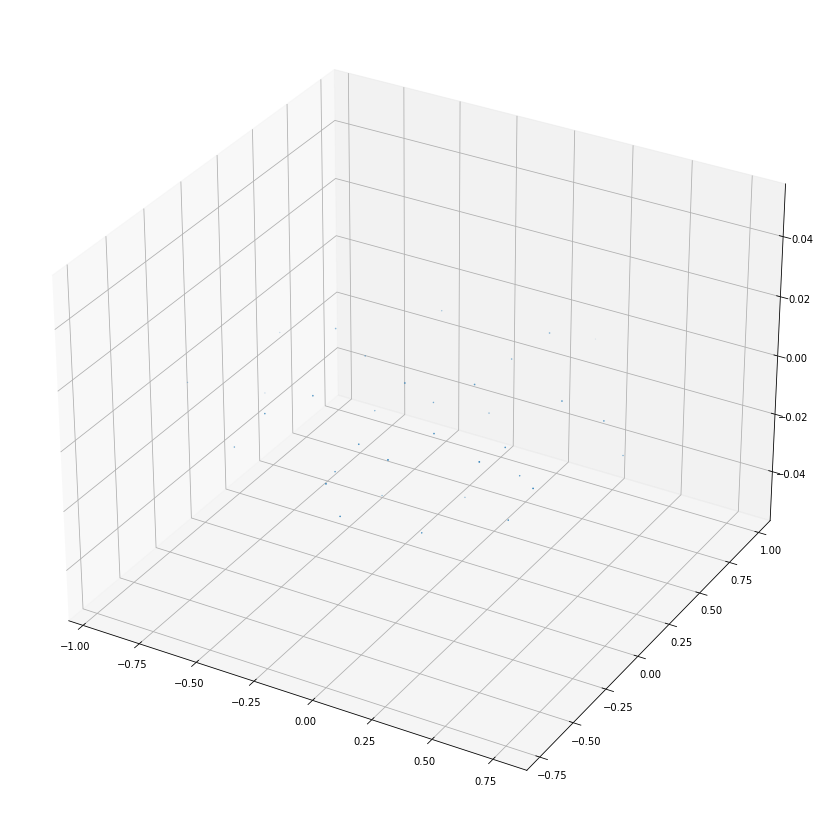

In [570]:
plt.figure(figsize=[15, 15])
plt.subplot(111, projection='3d')
plt.scatter(N.loc[:, 'x'], N.loc[:, 'y'], N.loc[:, 'z'])
plt.show()

# todo: sevenths (4 note chords)

In [ ]:
set('CDEFGAB') <= set(X.index)

In [25]:
import math
print(math.comb(7, 2) + math.comb(7, 1))
print(math.comb(7, 3) + math.comb(7, 2) + math.comb(7, 1))

28
63
